In [1]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


*rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures

*width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally

*rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.

*shear_range is for randomly applying shearing transformations

*zoom_range is for randomly zooming inside pictures

*horizontal_flip is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).
fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


datagen.flow() generates augmented images based on the defined augmentation parameters 

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the dataset
train_data_dir = '/Users/muskankhandelwal/Documents/SML/final_dataset_final/train/'
test_data_dir = '/Users/muskankhandelwal/Documents/SML/final_dataset_final/test/'

# Set up data generators for training and validation/test
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model using data generators
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model on the test data
results = model.evaluate(test_generator)
print("Test Accuracy:", results[1])


Found 14178 images belonging to 2 classes.
Found 3545 images belonging to 2 classes.
Epoch 1/10
443/443 [==============================] - 113s 254ms/step - loss: 0.6119 - accuracy: 0.6810 - val_loss: 0.5673 - val_accuracy: 0.7136
Epoch 2/10
443/443 [==============================] - 97s 218ms/step - loss: 0.5161 - accuracy: 0.7529 - val_loss: 0.4708 - val_accuracy: 0.7795
Epoch 3/10
443/443 [==============================] - 98s 221ms/step - loss: 0.4355 - accuracy: 0.7975 - val_loss: 0.4227 - val_accuracy: 0.8125
Epoch 4/10
443/443 [==============================] - 109s 245ms/step - loss: 0.3506 - accuracy: 0.8479 - val_loss: 0.3609 - val_accuracy: 0.8528
Epoch 5/10
443/443 [==============================] - 110s 249ms/step - loss: 0.2674 - accuracy: 0.8898 - val_loss: 0.3180 - val_accuracy: 0.8781
Epoch 6/10
443/443 [==============================] - 111s 249ms/step - loss: 0.1927 - accuracy: 0.9221 - val_loss: 0.3099 - val_accuracy: 0.8892
Epoch 7/10
443/443 [=====================

In [41]:
for layer in model.layers:
    print(layer.name)
# Evaluate the model on the test data
results = model.evaluate(test_generator)

# List of metric names
metric_names = model.metrics_names

# Print all evaluation metrics
for metric_name, result in zip(metric_names, results):
    print(f"{metric_name.capitalize()}: {result}")


conv2d_3
max_pooling2d_3
conv2d_4
max_pooling2d_4
conv2d_5
max_pooling2d_5
flatten_1
dense_2
dropout_1
dense_3
111/111 [==============================] - 7s 63ms/step - loss: 0.3368 - accuracy: 0.9052
Loss: 0.33681127429008484
Accuracy: 0.9052186012268066


In [43]:
# Save the trained model
model.save('autism_classifier2.h5')

/Users/muskankhandelwal/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

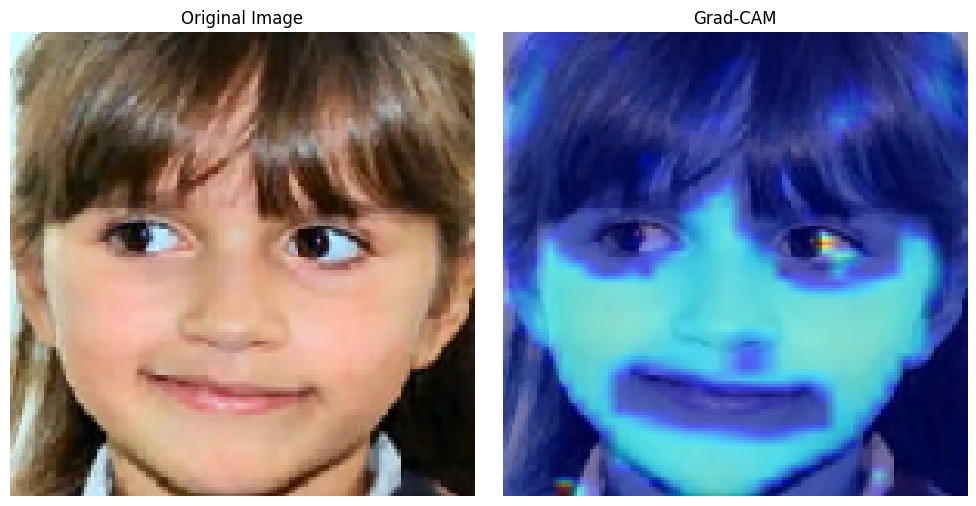

In [23]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Model

model = load_model('autism_classifier2.h5')  # Load your trained model here

def generate_grad_cam(model, img_path, img_width=150, img_height=150, overlay_weight=0.5):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Define the required layers of the model
    last_conv_layer = model.get_layer('conv2d_5')
    classifier_layer = model.layers[-1].output
    conv_model = Model(inputs=model.input, outputs=[last_conv_layer.output, classifier_layer])

    # Perform gradient computation
    with tf.GradientTape() as tape:
        conv_outputs, predictions = conv_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.nn.relu(heatmap)
    heatmap /= tf.reduce_max(heatmap)

    # Resize heatmap to the image size
    heatmap = tf.image.resize(heatmap, (img_width, img_height))

    # Convert heatmap to RGB format
    heatmap = tf.expand_dims(heatmap, axis=-1)
    heatmap = tf.concat([heatmap, heatmap, heatmap], axis=-1)
    heatmap = np.array(heatmap[0])

    # Apply the color map
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Resize heatmap to match the image dimensions
    heatmap = cv2.resize(heatmap, (img_array.shape[2], img_array.shape[1]))  # Use img_array's shape

    # Overlay heatmap on the image
    superimposed_img = cv2.addWeighted(np.uint8(255 * img_array[0]), 1 - overlay_weight, heatmap, overlay_weight, 0)

    return np.uint8(255 * img_array[0]), superimposed_img

image_path = '/Users/muskankhandelwal/Documents/SML/final_dataset_final/test/autistic/0006.jpg'  # Replace with your image path
original_img, grad_cam_img = generate_grad_cam(model, image_path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Grad-CAM')
plt.imshow(cv2.cvtColor(grad_cam_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')

plt.tight_layout()
plt.show()


Visualization on Auutistic image

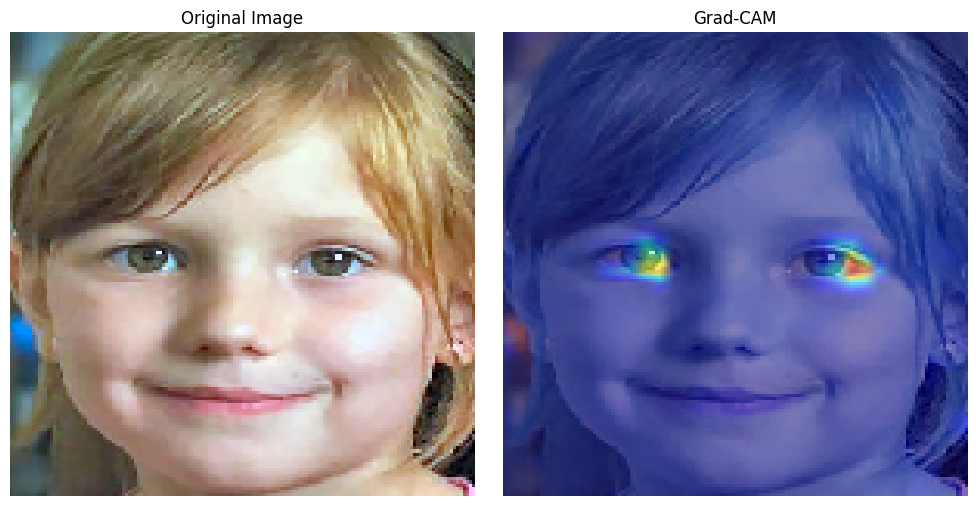

In [46]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Model

model = load_model('autism_classifier2.h5')  # Load your trained model here

def generate_grad_cam(model, img_path, img_width=150, img_height=150, overlay_weight=0.5):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Define the required layers of the model
    last_conv_layer = model.get_layer('conv2d_5')
    classifier_layer = model.layers[-1].output
    conv_model = Model(inputs=model.input, outputs=[last_conv_layer.output, classifier_layer])

    # Perform gradient computation
    with tf.GradientTape() as tape:
        conv_outputs, predictions = conv_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.nn.relu(heatmap)
    heatmap /= tf.reduce_max(heatmap)

    # Resize heatmap to the image size
    heatmap = tf.image.resize(heatmap, (img_width, img_height))

    # Convert heatmap to RGB format
    heatmap = tf.expand_dims(heatmap, axis=-1)
    heatmap = tf.concat([heatmap, heatmap, heatmap], axis=-1)
    heatmap = np.array(heatmap[0])

    # Apply the color map
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Resize heatmap to match the image dimensions
    heatmap = cv2.resize(heatmap, (img_array.shape[2], img_array.shape[1]))  # Use img_array's shape

    # Overlay heatmap on the image
    superimposed_img = cv2.addWeighted(np.uint8(255 * img_array[0]), 1 - overlay_weight, heatmap, overlay_weight, 0)

    return np.uint8(255 * img_array[0]), superimposed_img

image_path = '/Users/muskankhandelwal/Documents/SML/final_dataset_final/test/autistic/0024.jpg'  # Replace with your image path
original_img, grad_cam_img = generate_grad_cam(model, image_path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Grad-CAM')
plt.imshow(cv2.cvtColor(grad_cam_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')

plt.tight_layout()
plt.show()


Visualization on non-Auutistic image

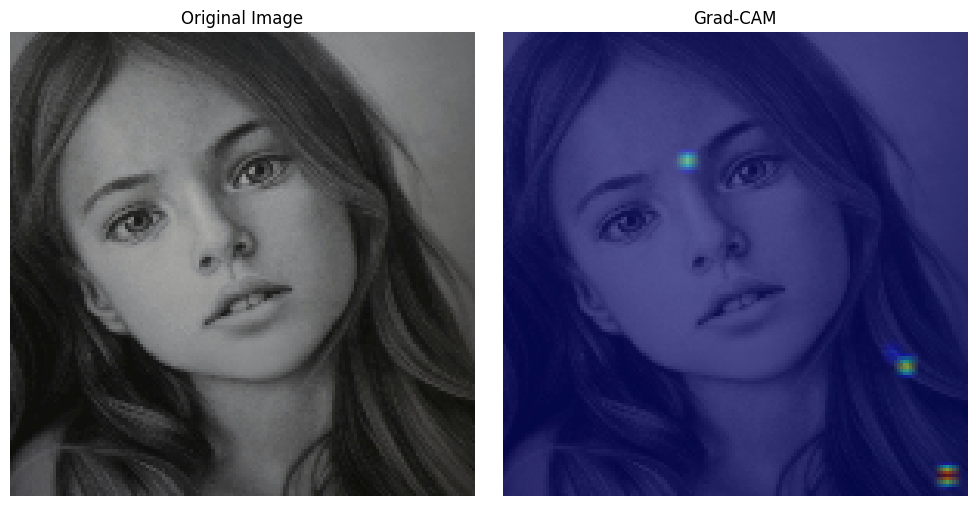

In [50]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Model

model = load_model('autism_classifier2.h5')  # Load your trained model here

def generate_grad_cam(model, img_path, img_width=150, img_height=150, overlay_weight=0.5):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Define the required layers of the model
    last_conv_layer = model.get_layer('conv2d_5')
    classifier_layer = model.layers[-1].output
    conv_model = Model(inputs=model.input, outputs=[last_conv_layer.output, classifier_layer])

    # Perform gradient computation
    with tf.GradientTape() as tape:
        conv_outputs, predictions = conv_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.nn.relu(heatmap)
    heatmap /= tf.reduce_max(heatmap)

    # Resize heatmap to the image size
    heatmap = tf.image.resize(heatmap, (img_width, img_height))

    # Convert heatmap to RGB format
    heatmap = tf.expand_dims(heatmap, axis=-1)
    heatmap = tf.concat([heatmap, heatmap, heatmap], axis=-1)
    heatmap = np.array(heatmap[0])

    # Apply the color map
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Resize heatmap to match the image dimensions
    heatmap = cv2.resize(heatmap, (img_array.shape[2], img_array.shape[1]))  # Use img_array's shape

    # Overlay heatmap on the image
    superimposed_img = cv2.addWeighted(np.uint8(255 * img_array[0]), 1 - overlay_weight, heatmap, overlay_weight, 0)

    return np.uint8(255 * img_array[0]), superimposed_img

image_path = '/Users/muskankhandelwal/Documents/SML/final_dataset_final/test/non_autistic/0867.jpg'  # Replace with your image path
original_img, grad_cam_img = generate_grad_cam(model, image_path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Grad-CAM')
plt.imshow(cv2.cvtColor(grad_cam_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')

plt.tight_layout()
plt.show()


Visualization on Auutistic image

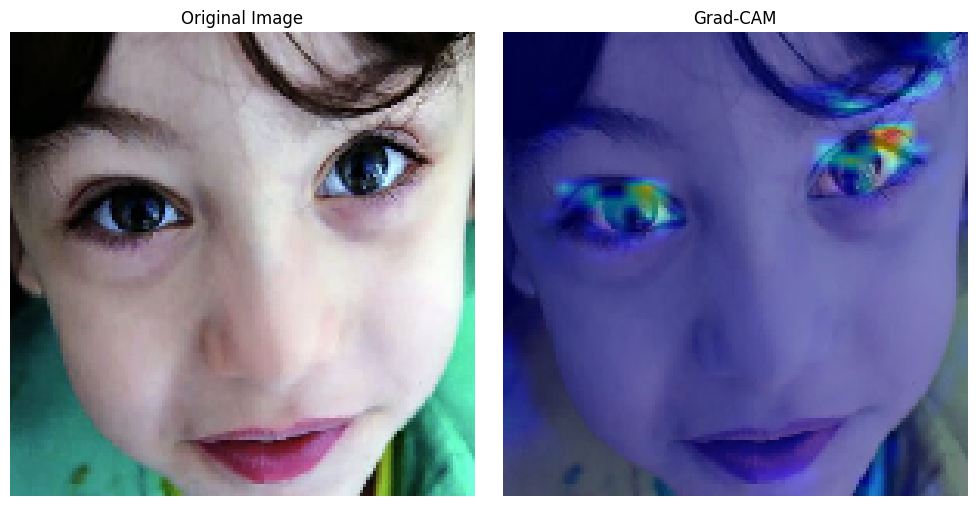

In [55]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Model

model = load_model('autism_classifier2.h5')  # Load your trained model here

def generate_grad_cam(model, img_path, img_width=150, img_height=150, overlay_weight=0.5):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Define the required layers of the model
    last_conv_layer = model.get_layer('conv2d_5')
    classifier_layer = model.layers[-1].output
    conv_model = Model(inputs=model.input, outputs=[last_conv_layer.output, classifier_layer])

    # Perform gradient computation
    with tf.GradientTape() as tape:
        conv_outputs, predictions = conv_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.nn.relu(heatmap)
    heatmap /= tf.reduce_max(heatmap)

    # Resize heatmap to the image size
    heatmap = tf.image.resize(heatmap, (img_width, img_height))

    # Convert heatmap to RGB format
    heatmap = tf.expand_dims(heatmap, axis=-1)
    heatmap = tf.concat([heatmap, heatmap, heatmap], axis=-1)
    heatmap = np.array(heatmap[0])

    # Apply the color map
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Resize heatmap to match the image dimensions
    heatmap = cv2.resize(heatmap, (img_array.shape[2], img_array.shape[1]))  # Use img_array's shape

    # Overlay heatmap on the image
    superimposed_img = cv2.addWeighted(np.uint8(255 * img_array[0]), 1 - overlay_weight, heatmap, overlay_weight, 0)

    return np.uint8(255 * img_array[0]), superimposed_img

image_path = '/Users/muskankhandelwal/Documents/SML/final_dataset_final/test/autistic/0084.jpg'  # Replace with your image path
original_img, grad_cam_img = generate_grad_cam(model, image_path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Grad-CAM')
plt.imshow(cv2.cvtColor(grad_cam_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')

plt.tight_layout()
plt.show()


In [4]:
from tensorflow.keras.models import Model
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

model = load_model('autism_classifier2.h5')  # Load your trained model here
